The ImageNet project is a large visual database designed for visual object recognition software research. The idea for this project was conceived over 15 years ago by AI researcher Fei-Fei Li. The ImageNet team presented their dataset for the first time in 2009.

Since 2010, the ImageNet project runs an annual software competition where research teams evaluate their computer vision algorithms for various visual recognition tasks such as Object Classification and Object Localization. The training data is a subset of ImageNet with 1.2 million images belonging to 1,000 classes. Deep Learning came to the limelight in 2012 when Alex Krizhevsky and his team won the competition by a margin of a whopping 11%. ILSVRC and Imagenet are sometimes used interchangeably.

There are various subsets of the ImageNet dataset used in various contexts. One of the most highly used subsets of ImageNet is the "ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012-2017 image classification and localization dataset". This is also referred to in the research literature as ImageNet-1K or ILSVRC2017, reflecting the original ILSVRC challenge that involved 1,000 classes.

In [3]:
#------------------------------------
# Importing the required library
#------------------------------------


import tensorflow as tf
import matplotlib.pyplot as plt
import glob as glob
import os

from zipfile import ZipFile
from urllib.request import urlretrieve


In [11]:
#---------------------------------------------
# Function to download image from the url
#---------------------------------------------

def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets", end='')

    #Download zipfile using urllib package

    urlretrieve(url, save_path)

    try:
        #Extracting the zipfile using zipfile package
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])
        print("\nDone")

    except Exception as e:
        print('\n Invalid file. ', e)

In [12]:
#-----------------------------------------------
# url and call the download function
#-----------------------------------------------

URL = r"https://www.dropbox.com/s/8srx6xdjt9me3do/TF-Keras-Bootcamp-NB07-assets.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), "TF-Keras-Bootcamp-NB07-assets.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [13]:
#--------------------------
# Read Sample image
#--------------------------

image_paths = sorted(glob.glob('images' + os.sep + "*.png"))
print(image_paths)

['images/baseball-player.png', 'images/clown-fish.png', 'images/elephant.png', 'images/forklift.png', 'images/ice-cream.png', 'images/lemons.png', 'images/magnetic-compass.png', 'images/polar-bear.png']


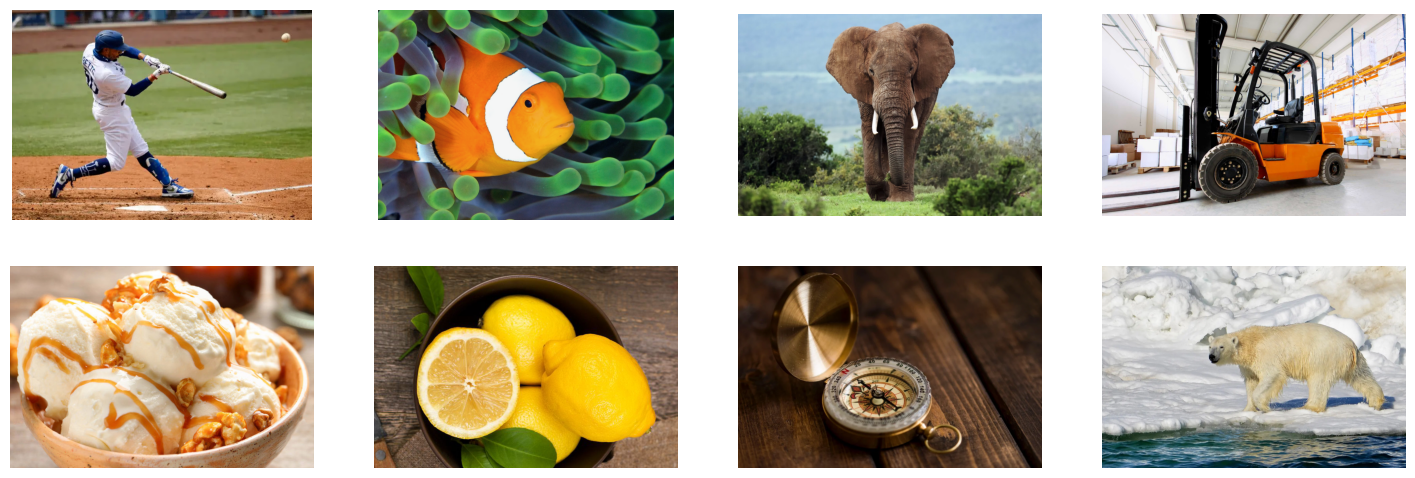

In [14]:
#---------------------------------
# Display all the image using matplotlib pakage
#---------------------------------

plt.figure(figsize=(18, 6))

for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(2, 4,idx + 1)
    plt.imshow(image)
    plt.axis('off')

In [18]:
#------------------------------------------------
# Load the Model
# we will used 3 model to test
# 1. vgg16
# 2. resnet50
# 3. inception_v3
#------------------------------------------------

model_vgg16 = tf.keras.applications.vgg16.VGG16()
model_resnet50 = tf.keras.applications.resnet50.ResNet50()
model_inception_v3 = tf.keras.applications.inception_v3.InceptionV3()


96112376/96112376 [==============================] - 3s 0us/step


In [20]:
print(model_vgg16.input_shape)
print(model_resnet50.input_shape)
print(model_inception_v3.input_shape)

(None, 224, 224, 3)
(None, 224, 224, 3)
(None, 299, 299, 3)


In [35]:
#---------------------------------------------
#Since we are using the Keras API, there is very little code required to use the models. For convenience, we will create a function that will automate the processing steps required for processing each image.
#
#    Read the images
#    Perform the required pre-processing for the images as required by the model
#    Add a batch dimension to the image tensor
#    Call the model's predict() method to make predictions
#    Decode the predictions to find the class name and confidence score for the top-k predictions
#    Display the results
#
#---------------------------------------------

def process_images(model, image_paths, size, preprocess_input, display_top_k = False, top_k = 2):
    plt.figure(figsize=(20, 7))

    for idx, image_path in enumerate(image_paths):
        tf_image = tf.io.read_file(image_path)

        decoded_image = tf.image.decode_image(tf_image)

        image_resize = tf.image.resize(decoded_image, size)

        image_batch = tf.expand_dims(image_resize, axis=0)

        image_batch = preprocess_input(image_batch)

        preds = model.predict(image_batch)

        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds = preds,
            top   = 5
        )

        if display_top_k == True:
            for jdx in range(top_k):
                print('{} predicted class: Pr(Class = {:20} [index = {:4}]) = {:5.2f}'.format(
                    jdx + 1,
                    decoded_preds[0][jdx][1],
                    jdx,
                    decoded_preds[0][jdx][2] * 100
                ))


        plt.subplot(2,4,idx + 1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label = decoded_preds[0][0][1]
        score = decoded_preds[0][0][2] * 100
        title = label + ' ' + str(' {:.2f}%'.format(score))
        plt.title(title, fontsize=16)


1/1 [==============================] - 1s 589ms/step


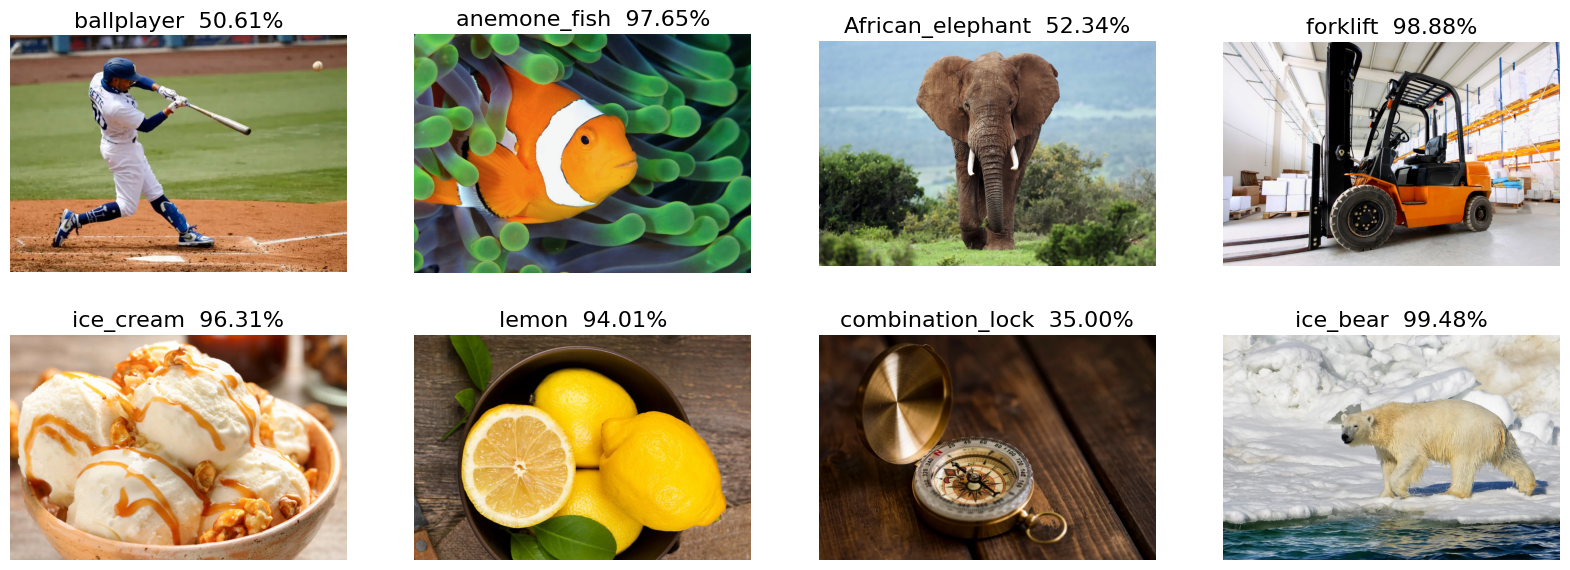

In [29]:
#-----------------------------------------
# Vgg16 model prediction
#-----------------------------------------

model = model_vgg16
size = (224, 224)

preprocess_input = tf.keras.applications.vgg16.preprocess_input

process_images(model, image_paths, size, preprocess_input)

1/1 [==============================] - 0s 189ms/step


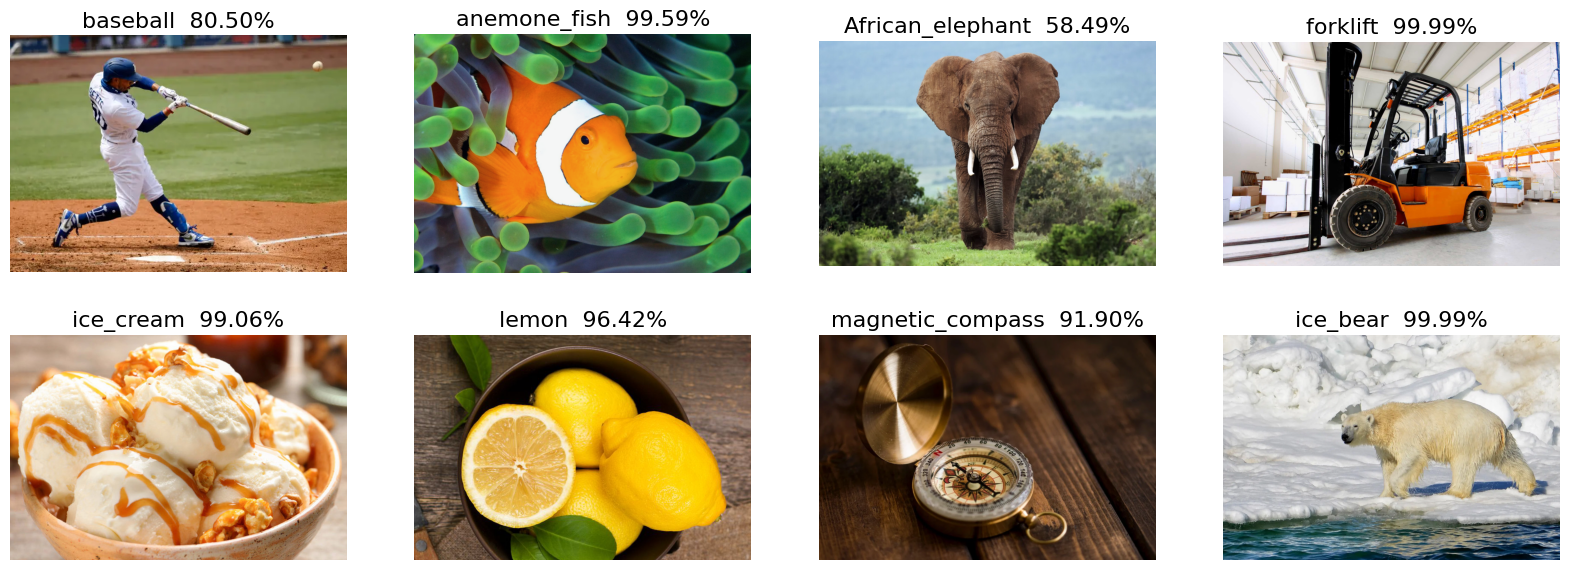

In [30]:
#-----------------------------------------
# Resnet50 model prediction
#-----------------------------------------

model = model_resnet50
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, image_paths, size, preprocess_input)

1/1 [==============================] - 2s 2s/step
1 predicted class: Pr(Class = ballplayer           [index =    0]) = 69.22
2 predicted class: Pr(Class = baseball             [index =    1]) = 30.62
1/1 [==============================] - 0s 240ms/step
1 predicted class: Pr(Class = anemone_fish         [index =    0]) = 92.48
2 predicted class: Pr(Class = sea_anemone          [index =    1]) =  2.61
1/1 [==============================] - 0s 242ms/step
1 predicted class: Pr(Class = African_elephant     [index =    0]) = 89.94
2 predicted class: Pr(Class = tusker               [index =    1]) =  7.94
1/1 [==============================] - 0s 236ms/step
1 predicted class: Pr(Class = forklift             [index =    0]) = 98.95
2 predicted class: Pr(Class = golfcart             [index =    1]) =  0.07
1/1 [==============================] - 0s 242ms/step
1 predicted class: Pr(Class = ice_cream            [index =    0]) = 99.60
2 predicted class: Pr(Class = cradle               [index =    

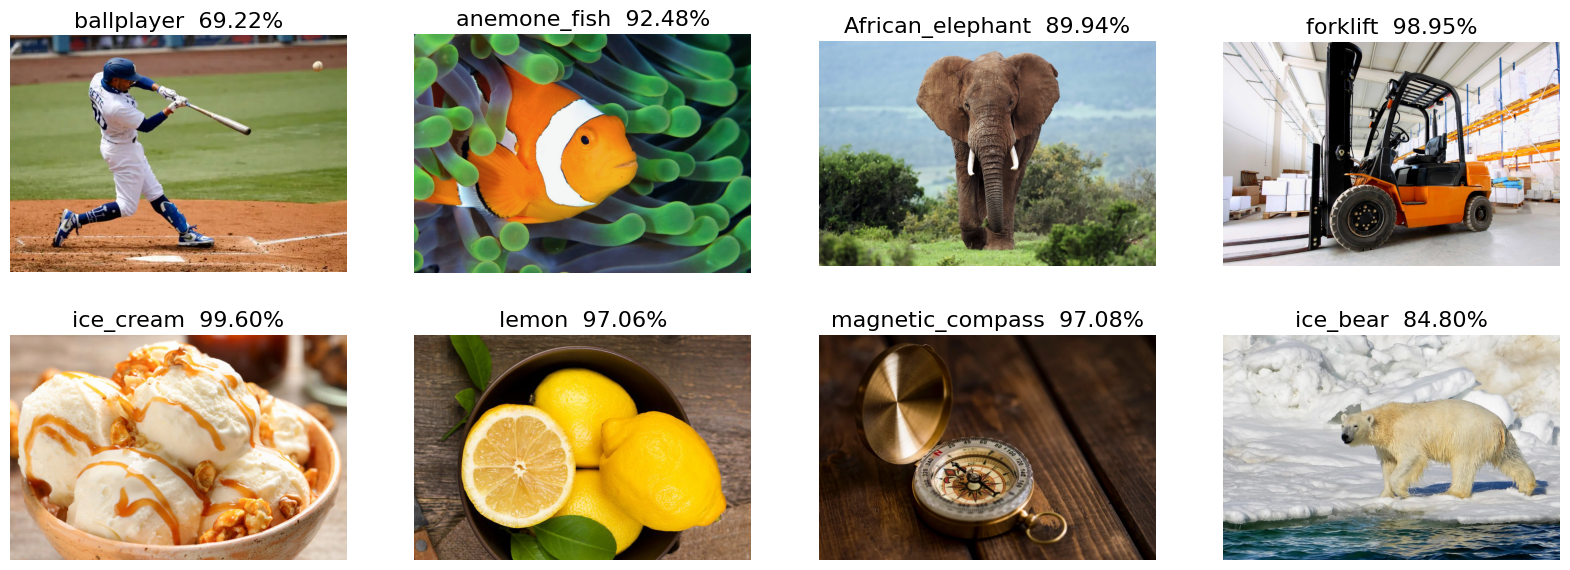

In [36]:
#-----------------------------------------
# inception_v3 model prediction
#-----------------------------------------

model = model_inception_v3
size = (299, 299)

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_images(model, image_paths, size, preprocess_input,display_top_k=True)